In [2]:
#Import the required libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
# Read the dataset:
data = pd.read_csv('pollution_data.csv')

In [7]:
#Perform Exploratory Data Analysis (EDA):

# Display the first few rows of the dataset
print(data.head())


               state    status  AQI-US  PM2.5  PM10  Temp  Humid
0     Andhra Pradesh  MODERATE      56     16    31    28     74
1  Arunachal Pradesh      GOOD      39     11    17    21    100
2              Assam      GOOD      46     13    20    23     98
3              Bihar  MODERATE      87     28    53    31     58
4         Chandigarh      POOR     107     38    49    25     53


In [8]:
# Check the data types of columns
print(data.dtypes)


state     object
status    object
AQI-US     int64
PM2.5      int64
PM10       int64
Temp       int64
Humid      int64
dtype: object


In [9]:

# Summary statistics
print(data.describe())

           AQI-US      PM2.5        PM10       Temp       Humid
count   34.000000  34.000000   34.000000  34.000000   34.000000
mean    64.382353  19.382353   41.058824  24.676471   77.911765
std     25.817559  10.048412   22.571021   4.623527   14.321773
min     14.000000   2.000000    5.000000  13.000000   53.000000
25%     54.250000  14.250000   29.500000  21.500000   67.250000
50%     63.000000  18.000000   40.500000  27.000000   78.000000
75%     77.500000  22.000000   51.750000  28.000000   86.750000
max    108.000000  38.000000  113.000000  31.000000  100.000000


In [10]:
# Check for missing values
print(data.isnull().sum())

state     0
status    0
AQI-US    0
PM2.5     0
PM10      0
Temp      0
Humid     0
dtype: int64


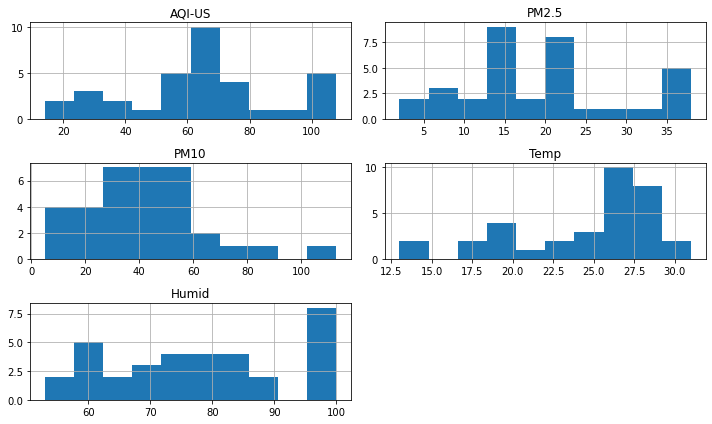

In [12]:
# Data visualization
# Histograms
data.hist(figsize=(10, 6), bins=10)
plt.tight_layout()
plt.show()



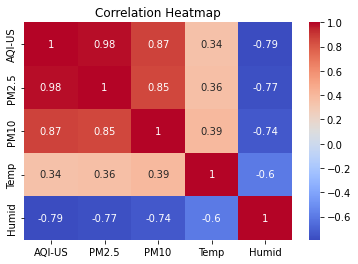

In [13]:
# Correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Select the relevant features for clustering
segmentation_variables = ['AQI-US', 'PM2.5', 'PM10', 'Temp', 'Humid']

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data[segmentation_variables])

# Add the cluster labels to the dataset
data['cluster'] = kmeans.labels_

# Analyze the segments
segmented_data = data.groupby('cluster').mean()
print("Segmented Data:\n", segmented_data)

# Assign states to clusters
state_clusters = data[['state', 'cluster']]
print("State-Cluster Assignment:\n", state_clusters)

Segmented Data:
              AQI-US      PM2.5       PM10       Temp      Humid
cluster                                                        
0         32.333333   8.333333  15.666667  21.555556  94.444444
1         65.833333  18.666667  42.000000  25.222222  76.500000
2        101.857143  35.428571  71.285714  27.285714  60.285714
State-Cluster Assignment:
                      state  cluster
0           Andhra Pradesh        1
1        Arunachal Pradesh        0
2                    Assam        0
3                    Bihar        2
4               Chandigarh        2
5             Chhattisgarh        1
6   Dadra And Nagar Haveli        1
7            Daman And Diu        1
8                    Delhi        2
9                      Goa        0
10                 Gujarat        1
11                 Haryana        2
12        Himachal Pradesh        1
13       Jammu And Kashmir        1
14               Jharkhand        1
15               Karnataka        0
16                  Kera

### CONCLUSION:

Based on the provided segmented data and state-cluster assignments, we can draw the following conclusions:

Segmented Data:

- Cluster 0: This segment has relatively lower values for AQI-US, PM2.5, PM10, and temperature, indicating good air quality and lower pollution levels. The humidity level is relatively higher compared to other clusters.
- Cluster 1: This segment has moderate values for AQI-US, PM2.5, PM10, and temperature. The humidity level is moderate as well.
- Cluster 2: This segment has higher values for AQI-US, PM2.5, PM10, and temperature, suggesting poorer air quality and higher pollution levels. The humidity level is relatively lower compared to other clusters.

State-Cluster Assignment:

- The state-cluster assignment shows the mapping of each state to the respective cluster. For example, Andhra Pradesh is assigned to Cluster 1, indicating that it belongs to the segment with moderate values for the selected features.

Based on these findings, we can infer that:

- Cluster 0 represents states with relatively good air quality and lower pollution levels.
- Cluster 1 includes states with moderate levels of air pollution.
- Cluster 2 consists of states with poorer air quality and higher pollution levels.

These insights can help in understanding the air quality patterns and identifying regions that may require more attention and efforts to improve air quality. Additionally, this segmentation analysis can assist policymakers and stakeholders in developing targeted strategies and interventions to address specific air pollution challenges in different clusters or segments.

Remember to interpret the results in the context of the specific domain and the dataset used for analysis.